In [1]:
import os

import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import torch_geometric as pyg

# enable multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pyg.seed.seed_everything(1234)

In [9]:
%cd /Users/cgu3/Documents/Grape-Pi
%pwd


/Users/cgu3/Documents/Grape-Pi


/Users/cgu3/miniforge3/envs/grape-pi/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/cgu3/Documents/Grape-Pi'

In [201]:
!python grape_pi.py --cfg configs/protein/grapepi_sageconv.yaml --threshold 0.9 --num-promoted 100 --output saved_results/gastric_sageconv_with_mRNA/evaluation --override " 'dataset.node_numeric_cols=[protein_probability, mRNA_TPM]' run.name=gastric_sageconv_with_mRNA"

GraphsageGraphGymModule(
  (model): GNN(
    (encoder): FeatureEncoder()
    (pre_mp): GeneralMultiLayer(
      (Layer_0): GeneralLayer(
        (layer): Linear(
          (model): Linear(-1, 10, bias=True)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (mp): GNNStackStage(
      (layer0): GeneralLayer(
        (layer): SAGEConv(
          (model): SAGEConv(10, 10, aggr=mean)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (post_mp): ExampleNodeHead(
      (layer_post_mp): MLP(
        (model): Sequential(
          (0): Linear(
            (model): Linear(10, 1, bias=True)
          )
        )
      )
    )
  )
)
accelerator: cpu
benchmark: False
bn:
  eps: 1e-05
  mom: 0.1
cfg_dest: config.yaml
custom_metrics: []
dataset:
  cache_load: False
  cache_save: False
  dir: data/gastric_all_data
  edge_dim: 128
  edge_encoder: False
  edge_encoder_bn: True
  edge_encoder_name: Bond
  edge_message_

In [202]:
!python grape_pi.py --cfg configs/protein/grapepi_sageconv.yaml --checkpoint results/gastric_sageconv_with_mRNA/1234/ckpt/epoch=151-step=14592.ckpt  --threshold 0.9 --num-promoted 100 --output saved_results/gastric_sageconv_with_mRNA/evaluation_test --override "dataset.dir=data/gastric_test_data 'dataset.node_numeric_cols=[protein_probability, mRNA_TPM]' run.name=gastric_sage_conv_with_mRNA dataset.label_col=protein_probability"

GraphsageGraphGymModule(
  (model): GNN(
    (encoder): FeatureEncoder()
    (pre_mp): GeneralMultiLayer(
      (Layer_0): GeneralLayer(
        (layer): Linear(
          (model): Linear(-1, 10, bias=True)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (mp): GNNStackStage(
      (layer0): GeneralLayer(
        (layer): SAGEConv(
          (model): SAGEConv(10, 10, aggr=mean)
        )
        (post_layer): Sequential(
          (0): ReLU()
        )
      )
    )
    (post_mp): ExampleNodeHead(
      (layer_post_mp): MLP(
        (model): Sequential(
          (0): Linear(
            (model): Linear(10, 1, bias=True)
          )
        )
      )
    )
  )
)
accelerator: cpu
benchmark: False
bn:
  eps: 1e-05
  mom: 0.1
cfg_dest: config.yaml
custom_metrics: []
dataset:
  cache_load: False
  cache_save: False
  dir: data/gastric_test_data
  edge_dim: 128
  edge_encoder: False
  edge_encoder_bn: True
  edge_encoder_name: Bond
  edge_message

In [171]:
first_data = pd.read_csv('saved_results/gastric-sageconv/evaluation/all_proteins.csv')
first_data

,accession,pred_prob,protein.Accession,protein_probability,protein_probability_soft_label,gene_symbol,mRNA_TPM,hard_label_04_06,hard_label_03_07,hard_label_02_08
0,A0A024RBG1,0.890145,A0A024RBG1,0.890032,0.667430,NUDT4B,0.0000,1.0,NaN,NaN
1,A0A075B6H7,0.537205,A0A075B6H7,0.700122,0.267383,IGKV3-7,0.0000,0.0,0.0,NaN
2,A0A075B6H8,0.313646,A0A075B6H8,0.286947,0.056265,IGKV1D-42,0.0000,0.0,0.0,0.0
3,A0A075B6L6,0.797134,A0A075B6L6,0.943529,0.140940,TRBV7-3,0.0000,0.0,0.0,0.0
4,A0A075B6N1,0.314290,A0A075B6N1,0.289680,0.153119,TRBV19,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20421,Q9UI54,0.109656,Q9UI54,0.000000,0.000000,0,0.0000,0.0,0.0,0.0
20422,Q9Y3F1,0.109656,Q9Y3F1,0.000000,0.197423,0,0.0000,0.0,0.0,0.0
20423,Q9Y6C7,0.109656,Q9Y6C7,0.000000,0.093179,LINC00312,0.0000,0.0,0.0,0.0
20424,Q9Y6Z2,0.109656,Q9Y6Z2,0.000000,0.000000,LINC01558,0.0531,0.0,0.0,0.0


In [172]:
test_data = pd.read_csv('saved_results/gastric-sageconv/evaluation_test/all_proteins.csv')
test_data

,accession,pred_prob,protein.Accession,protein_probability,protein_probability_soft_label
0,A0A024RBG1,0.983360,A0A024RBG1,0.999766,0.667430
1,A0A075B6H7,0.169146,A0A075B6H7,0.000000,0.267383
2,A0A075B6H8,0.728425,A0A075B6H8,0.166500,0.056265
3,A0A075B6L6,0.504430,A0A075B6L6,0.000000,0.140940
4,A0A075B6N1,0.342607,A0A075B6N1,0.000000,0.153119
...,...,...,...,...,...
20421,Q9UI54,0.109656,Q9UI54,0.000000,0.000000
20422,Q9Y3F1,0.109656,Q9Y3F1,0.748260,0.197423
20423,Q9Y6C7,0.109656,Q9Y6C7,0.000000,0.093179
20424,Q9Y6Z2,0.109656,Q9Y6Z2,0.000000,0.000000


In [173]:
len(first_data[first_data['protein_probability'] <= 0.1])

9923

In [197]:
# filter test_data with protein_probability < 0.9
test_data = test_data[(test_data['protein_probability'] <= 0.9) & (test_data['protein_probability'] >= 0.5)]
# get accessions
test_low_accessions = test_data['accession']
first_low_accessions = first_data[(first_data['protein_probability'] <=0.9) & (first_data['protein_probability'] >= 0.5)]['accession']

#  get accession with hard_label_03_07
unlabeled_data = first_data[first_data['hard_label_03_07'].isna()]
# get the union of the two sets
accession_union = set(test_low_accessions).union(set(first_low_accessions)).union(set(unlabeled_data['accession']))
# filter the first_data with the intersection
first_data = first_data[first_data['accession'].isin(accession_union)]
# filter the test_data with the intersection
test_data = test_data[test_data['accession'].isin(accession_union)]



KeyError: 'accession'

9892

In [175]:
# join based on accession
first_data = first_data.set_index('accession')
test_data = test_data.set_index('accession')
# join the two datasets
joined_data = first_data.join(test_data, lsuffix='_first', rsuffix='_test')

In [176]:
len(first_low_accessions)

2182

In [177]:
# check correlation between the two datasets for pred_prob
joined_data['protein_probability_first'].corr(joined_data['protein_probability_test'], method='spearman')

0.05643677324604328

In [178]:
# check correlation between the two datasets for pred_prob
joined_data['pred_prob_first'].corr(joined_data['pred_prob_test'], method='spearman')

0.31429536803017183

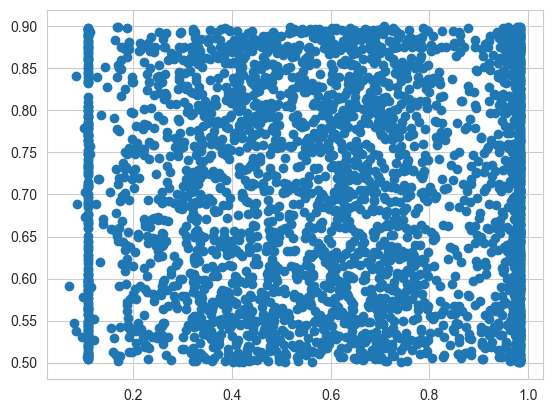

In [179]:
# scatter plot for pred_prob and protein_probability
plt.scatter(test_data['pred_prob'], test_data['protein_probability'])

In [194]:
# get the top 500 proteins based on pred_prob_test from joined_data
top_500_test = joined_data.sort_values('protein_probability_test', ascending=False).head(5000)
# get the top 500 proteins based on pred_prob_first from joined_data
top_500_first = joined_data.sort_values('protein_probability_first', ascending=False).head(5000)

In [ ]:
accession_union

In [196]:
top_500

,pred_prob_first,protein.Accession_first,protein_probability_first,protein_probability_soft_label_first,gene_symbol,mRNA_TPM,hard_label_04_06,hard_label_03_07,hard_label_02_08,pred_prob_test,protein.Accession_test,protein_probability_test,protein_probability_soft_label_test
accession,,,,,,,,,,,,,
Q6Y2X3,0.375913,Q6Y2X3,0.166549,0.533828,DNAJC14,3.393805,NaN,NaN,NaN,0.984151,Q6Y2X3,0.604410,0.533828
Q6ZMT1,0.244419,Q6ZMT1,0.000000,0.295783,STAC2,0.142233,0.0,0.0,NaN,0.984149,Q6ZMT1,0.547397,0.295783
P35030,0.150474,P35030,0.000000,0.393994,PRSS3,2.706240,0.0,NaN,NaN,0.984149,P35030,0.170411,0.393994
Q6NZY7,0.115197,Q6NZY7,0.000000,0.325641,CDC42EP5,0.039865,0.0,NaN,NaN,0.984149,Q6NZY7,0.000000,0.325641
P22223,0.433456,P22223,0.561112,0.827578,CDH3,3.496029,1.0,1.0,1.0,0.984149,P22223,0.464667,0.827578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q6YFQ2,0.532434,Q6YFQ2,0.378203,0.026561,COX6B2,3.492748,0.0,0.0,0.0,0.984121,Q6YFQ2,0.000000,0.026561
P49767,0.168877,P49767,0.000000,0.399449,VEGFC,0.053871,0.0,NaN,NaN,0.984121,P49767,0.476282,0.399449
P63122,0.439383,P63122,0.585955,0.262215,ERVK-8,0.000000,0.0,0.0,NaN,0.984121,P63122,0.000000,0.262215


In [195]:
# check overlap between the two sets
len(set(top_500_test.index).intersection(set(top_500_first.index)))

2893